In [1]:
import random
import timeit

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

The ergodicity problem in economics: https://www.nature.com/articles/s41567-019-0732-0

# Additive Model

fixed amount is added or subtracted to initial investment.

In [4]:
def additive_model(n, h=.5, l=-.4):
    """
        returns a list of values with initial investment of 100 and rate of return is either h or l which is additive
        n = number of sequential repetitions of high or low returns in model
        h = high return
        l = low return
        if n = 10, h = .5, l = -.4 then
        for i in range(10):
            100 += random.choice([h, l])
    """
    a = []
    m = 100
    for i in range(n):
        m += random.choice([h, l])
        a.append(m)
    return a

In [5]:
additive_model(10, .5, -.4)

[100.5,
 101.0,
 100.6,
 100.19999999999999,
 99.79999999999998,
 99.39999999999998,
 98.99999999999997,
 98.59999999999997,
 99.09999999999997,
 99.59999999999997]

Multiple samples of additive model:
Array returns the 'nn' values, each value is final value after 'n' repetitions in additive model.

In [6]:
def additive_array(nn, n, h=.5, l=-.4):
    """
        returns an array of final values of size nn by calling additive_model(n, h=.5, l=-.4)
        n = number of sequential repetitions of high or low returns in model
        h = high return
        l = low return
        if nn = 100, n = 10, h = .5, l = -.4 then
        for i in range(100):
            a.append(additive_model(10)[-1])
    """
    a = []
    for i in range(nn):
        a.append(additive_model(n, h, l)[-1])
    return np.array(a)

In [7]:
a = additive_array(100, 100, .5, -.4)
a

array([105.9, 103.2, 107.7, 105.9,  96. , 103.2,  98.7, 100.5, 100.5,
        99.6, 105.9, 108.6, 114. ,  95.1, 109.5, 109.5, 110.4, 104.1,
       105. , 102.3, 105.9, 104.1, 101.4,  99.6,  97.8, 107.7,  96. ,
        98.7, 102.3, 105. , 111.3, 103.2, 110.4, 109.5, 110.4, 103.2,
       108.6,  93.3, 101.4, 105.9,  96.9,  98.7, 109.5, 113.1, 102.3,
       101.4, 109.5, 110.4, 100.5, 105.9,  96. ,  92.4, 104.1, 102.3,
       103.2, 102.3, 108.6, 103.2, 100.5, 102.3, 100.5, 109.5,  99.6,
       110.4, 105. ,  98.7, 105.9, 113.1, 100.5, 104.1,  98.7, 104.1,
       103.2, 109.5,  95.1, 114. , 114. , 109.5, 112.2, 106.8, 107.7,
       106.8, 104.1, 104.1,  94.2, 110.4, 104.1, 105.9, 101.4,  98.7,
       109.5, 103.2, 105. , 100.5, 101.4,  98.7, 105. , 101.4, 103.2,
       100.5])

In [8]:
(a>100).sum(), a.mean(), a.std()

(80, 104.0459999999997, 4.958697812934391)

when high is 0.5 and low is -0.4, after 100 repetions, average of additive array is approximately equal to 105 which is 100*(0.5-0.4)/2

In [9]:
a = additive_array(100, 1000, .5, -.5)
(a>100).sum(), a.mean(), a.std()

(47, 100.03, 14.767162896101606)

In [10]:
a = additive_array(100, 1000, .3, -.3)
(a>100).sum(), a.mean(), a.std()

(42, 99.38800000000003, 10.813984279625979)

how many times additive model gives more than the starting value for the following high nad low returns
1. high = -low
2. high = -low + .1
2. high = -low - .1

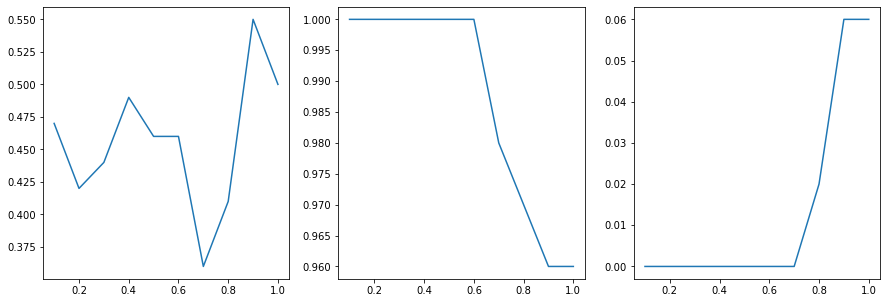

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
x = np.linspace(.1,1,10)
for i in range(1):
    axes[0].plot(x, [(additive_array(100, 1000, j, -j)>100).sum()/100 for j in x])
for i in range(1):
    axes[1].plot(x, [(additive_array(100, 1000, j+.1, -j)>100).sum()/100 for j in x])
for i in range(1):
    axes[2].plot(x, [(additive_array(100, 1000, j, -j-.1)>100).sum()/100 for j in x])

results of additive model when average of high returns and low returns is same but difference between high returns and low returns values is high
1. h = .5,  l = -.2
2. h = .3,  l = +.0
3. h = .2,  l = +.1

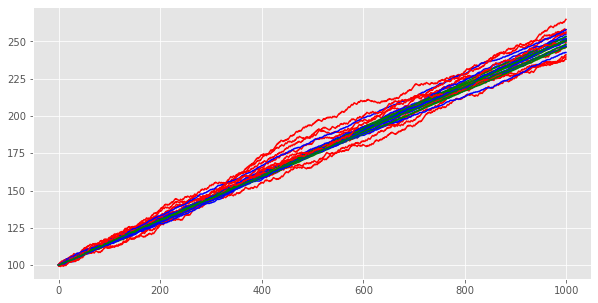

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
for i in range(10):
    plt.plot(additive_model(1000, .5, -.2), 'r')
    plt.plot(additive_model(1000, .3, .0), 'b')
    plt.plot(additive_model(1000, .2, .1), 'g')

even when average return is same, variance is high if difference between high returns and low returns values is high

# Multiplicative Model

certain percentage of amount is added or substracted to initial investment.

In [13]:
def multiplicative_model(n, h=.5, l=-.4):
    """
        returns a list of values with initial investment of 100 and rate of return is either h or l which is multiplicative
        n = number of sequential repetitions of high or low returns in model
        h = high return
        l = low return
        if n = 10, h = .5, l = -.4 then
        for i in range(10):
            100 *= (1+random.choice([h, l]))
    """
    a = []
    m = 100
    for i in range(n):
        m *= (1+random.choice([h, l]))
        a.append(m)
    return a

In [14]:
multiplicative_model(10)

[150.0,
 225.0,
 135.0,
 81.0,
 121.5,
 72.89999999999999,
 109.35,
 164.02499999999998,
 246.03749999999997,
 147.62249999999997]

function for constant growth rate

In [15]:
def average(n, m):
    lst = []
    x = 100
    for i in range(n):
        x = x*m
        lst.append(x)
    return lst

comparison between multiplicative model and constant growth rate which is average of high and low rates. 

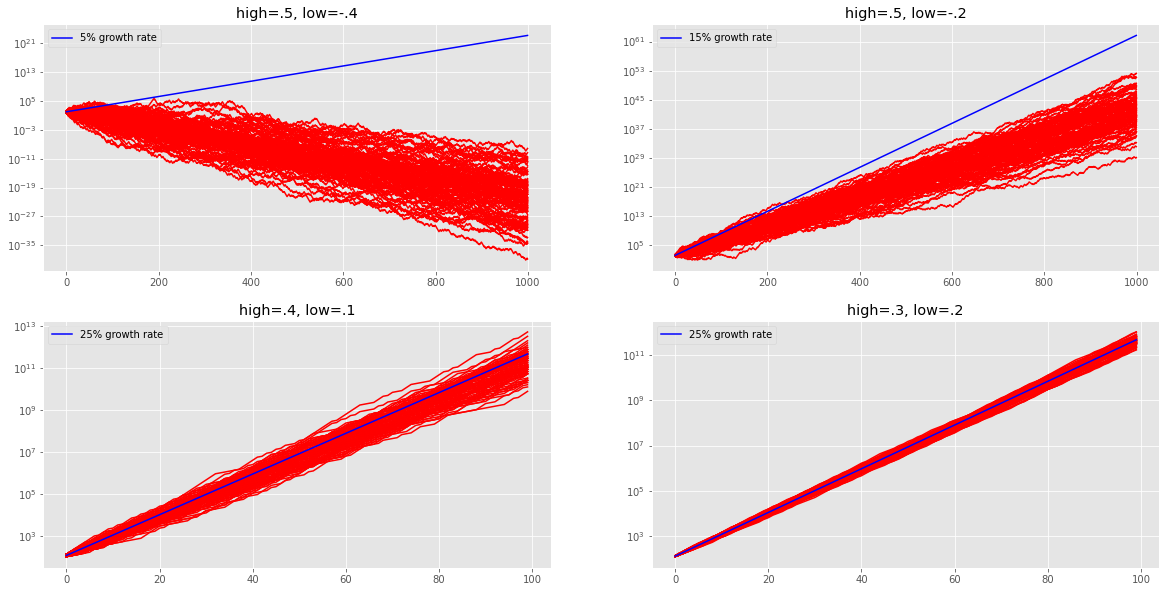

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
for i in range(100):
    axes[0,0].plot(multiplicative_model(1000, .5, -.4), 'r')
    axes[0,0].set_yscale('log')
axes[0,0].plot(average(1000, 1.05), 'b', label='5% growth rate')
axes[0,0].title.set_text('high=.5, low=-.4')
axes[0,0].legend()

for i in range(100):
    axes[0,1].plot(multiplicative_model(1000, .5, -.2), 'r')
    axes[0,1].set_yscale('log')
axes[0,1].plot(average(1000, 1.15), 'b', label='15% growth rate')
axes[0,1].title.set_text('high=.5, low=-.2')
axes[0,1].legend()

for i in range(100):
    axes[1,0].plot(multiplicative_model(100, .4, .1), 'r')
    axes[1,0].set_yscale('log')
axes[1,0].plot(average(100, 1.25), 'b', label='25% growth rate')
axes[1,0].title.set_text('high=.4, low=.1')
axes[1,0].legend()

for i in range(100):
    axes[1,1].plot(multiplicative_model(100, .3, .2), 'r')
    axes[1,1].set_yscale('log')
axes[1,1].plot(average(100, 1.25), 'b', label='25% growth rate')
axes[1,1].title.set_text('high=.3, low=.2')
axes[1,1].legend()

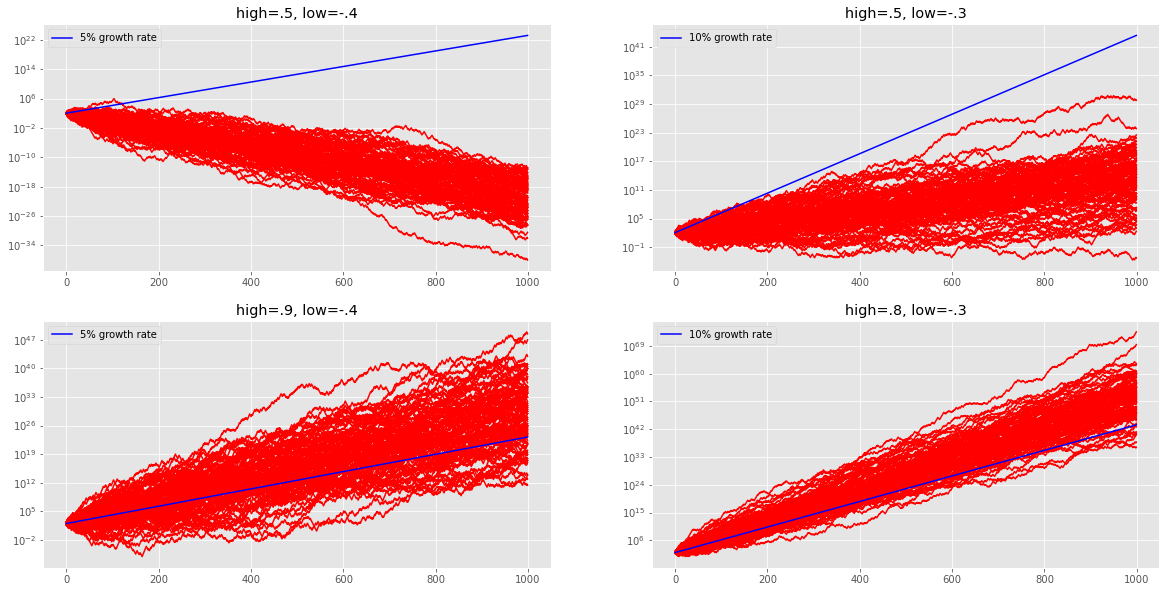

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
for i in range(100):
    axes[0,0].plot(multiplicative_model(1000, .5, -.4), 'r')
    axes[0,0].set_yscale('log')
axes[0,0].plot(average(1000, 1.05), 'b', label='5% growth rate')
axes[0,0].title.set_text('high=.5, low=-.4')
axes[0,0].legend()

for i in range(100):
    axes[0,1].plot(multiplicative_model(1000, .5, -.3), 'r')
    axes[0,1].set_yscale('log')
axes[0,1].plot(average(1000, 1.10), 'b', label='10% growth rate')
axes[0,1].title.set_text('high=.5, low=-.3')
axes[0,1].legend()

for i in range(100):
    axes[1,0].plot(multiplicative_model(1000, .9, -.4), 'r')
    axes[1,0].set_yscale('log')
axes[1,0].plot(average(1000, 1.05), 'b', label='5% growth rate')
axes[1,0].title.set_text('high=.9, low=-.4')
axes[1,0].legend()

for i in range(100):
    axes[1,1].plot(multiplicative_model(1000, .8, -.3), 'r')
    axes[1,1].set_yscale('log')
axes[1,1].plot(average(1000, 1.10), 'b', label='10% growth rate')
axes[1,1].title.set_text('high=.8, low=-.3')
axes[1,1].legend()

In multiplicative models, average growth rate when 'low' is negative is (high + 2* low)/2.  
example: when high is 0.9 nad low is -0.4 average is 0.9 + 2*(-0.4)/2 which is 0.05

In [17]:
def multiplicative_array(nn, n, h=.5, l=-.4):
    """
        returns an array of final values of size nn by calling additive_model(n, h=.5, l=-.4)
        n = number of sequential repetitions of high or low returns in model
        h = high return
        l = low return
        if nn = 100, n = 10, h = .5, l = -.4 then
        for i in range(100):
            a.append(additive_model(10)[-1])
    """
    a = []
    for i in range(nn):
        a.append(multiplicative_model(n, h, l)[-1])
    return np.array(a)

In [18]:
multiplicative_array(10, 100, .5, -.4)

array([8.24604033e-02, 1.25824590e+02, 7.86403688e+02, 3.22110950e+00,
       3.29841613e-02, 3.22110950e+00, 8.05277376e+00, 2.01319344e+01,
       8.44394530e-04, 5.15377521e-01])

In [19]:
a = multiplicative_array(100, 100, .5, -.4)
(a>100).sum(), a.mean(), a.std()

(13, 71.15256417444252, 288.88079016105485)

In [20]:
a = multiplicative_array(100, 100, .3, -.2)
(a>100).sum(), a.mean(), a.std()

(75, 9659.59503187976, 63601.046244450605)

In [21]:
a = multiplicative_array(100, 100, .1, -.0)
(a>100).sum(), a.mean(), a.std()

(100, 12101.726704800232, 5407.365210779886)

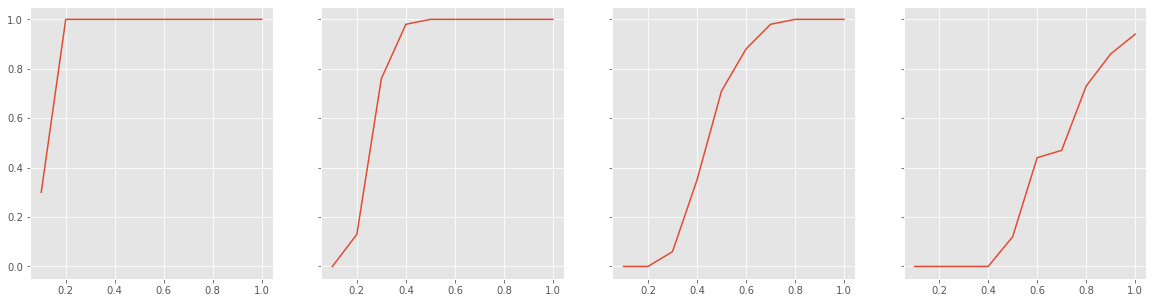

In [22]:
fig, axes = plt.subplots(1, 4, figsize=(20,5), sharey=True)
x = np.linspace(.1,1,10)
for i in range(1):
    axes[0].plot(x, [(multiplicative_array(100, 100, j, -.1)>100).sum()/100 for j in x])
for i in range(1):
    axes[1].plot(x, [(multiplicative_array(100, 100, j, -.2)>100).sum()/100 for j in x])
for i in range(1):
    axes[2].plot(x, [(multiplicative_array(100, 100, j, -.3)>100).sum()/100 for j in x])
for i in range(1):
    axes[3].plot(x, [(multiplicative_array(100, 100, j, -.4)>100).sum()/100 for j in x])

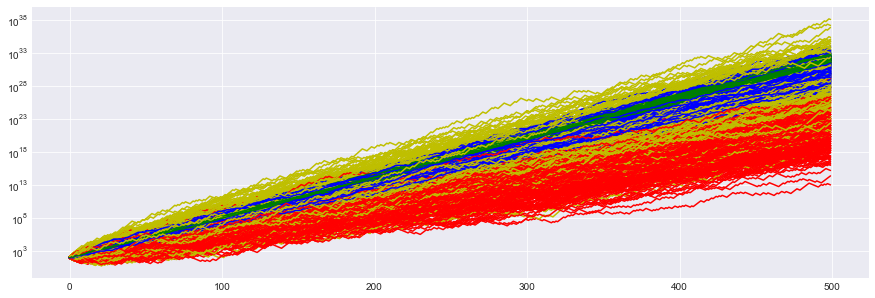

In [36]:
plt.figure(figsize=(15,5))
for i in range(300):
    plt.plot(multiplicative_model(500, .5, -.2), 'r')
    plt.plot(multiplicative_model(500, .3, .0), 'b')
    plt.plot(multiplicative_model(500, .2, .1), 'g')
    plt.plot(multiplicative_model(500, .6, -.2), 'y')
    plt.yscale('log')

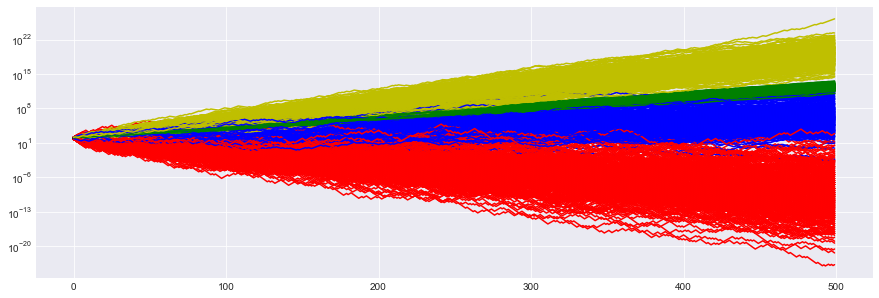

In [37]:
plt.figure(figsize=(15,5))
for i in range(300):
    plt.plot(multiplicative_model(500, .5, -.4), 'r')
    plt.plot(multiplicative_model(500, .3, -.2), 'b')
    plt.plot(multiplicative_model(500, .1, -.0), 'g')
    plt.plot(multiplicative_model(500, .3, -.1), 'y')
    plt.yscale('log')

In [25]:
index=np.linspace(.1,2,20)
df = pd.DataFrame(index=index)
for l in np.linspace(.1,.5,5):
    df[-l] = [((additive_array(100, 10, i, -l)>100).sum())/100 for i in index]

In [26]:
df

,-0.1,-0.2,-0.3,-0.4,-0.5
0.1,0.41,0.17,0.07,0.00,0.01
0.2,0.84,0.31,0.35,0.24,0.02
0.3,0.94,0.65,0.34,0.39,0.20
0.4,0.96,0.79,0.61,0.36,0.35
0.5,1.00,0.92,0.81,0.64,0.41
0.6,1.00,0.97,0.87,0.58,0.61
0.7,0.98,0.98,0.93,0.86,0.68
0.8,0.96,0.94,0.90,0.83,0.82
0.9,0.99,1.00,0.91,0.85,0.84
1.0,1.00,0.97,0.95,0.91,0.79


<AxesSubplot:>

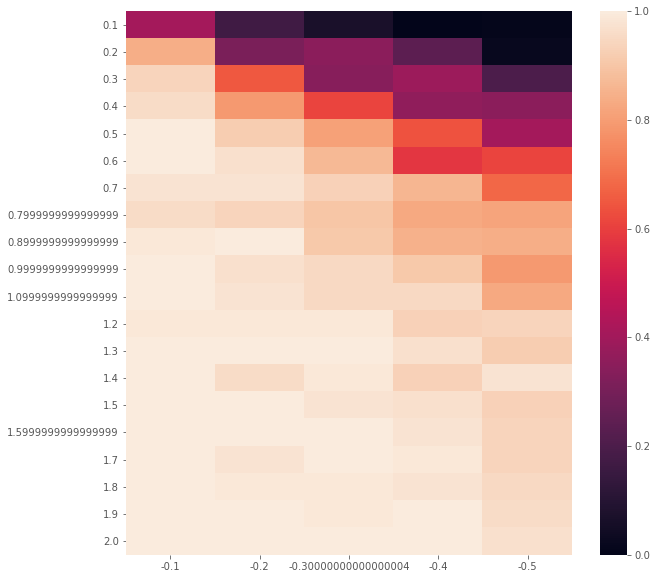

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df)

In [28]:
index=np.linspace(.1,2,20)
df = pd.DataFrame(index=index)
for l in np.linspace(.1,.5,5):
    df[-l] = [((multiplicative_array(100, 10, i, -l)>100).sum())/100 for i in index]

In [29]:
df

,-0.1,-0.2,-0.3,-0.4,-0.5
0.1,0.30,0.05,0.06,0.01,0.01
0.2,0.91,0.32,0.15,0.03,0.06
0.3,0.97,0.72,0.39,0.23,0.06
0.4,0.93,0.82,0.33,0.14,0.19
0.5,0.98,0.87,0.71,0.37,0.19
0.6,1.00,0.77,0.64,0.30,0.37
0.7,0.99,0.97,0.68,0.67,0.42
0.8,1.00,0.94,0.86,0.60,0.41
0.9,1.00,0.96,0.85,0.65,0.38
1.0,0.99,0.97,0.81,0.63,0.29


<AxesSubplot:>

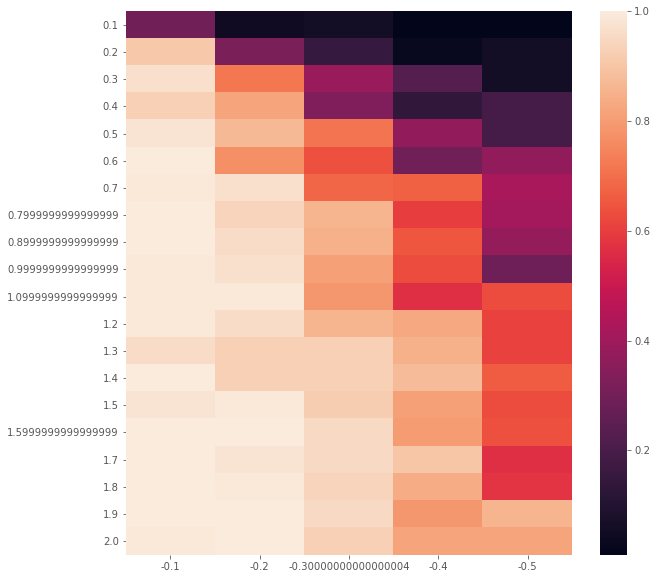

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df)

In [31]:
[((additive_array(100, 10, i, -.4)>100).sum())/100 for i in np.linspace(.1,1,10)]

[0.0, 0.11, 0.38, 0.39, 0.6, 0.62, 0.88, 0.79, 0.83, 0.9]

In [32]:
(additive_array(100, 10, .3, -.4)>100).sum()

47

Text(0, 0.5, 'probability')

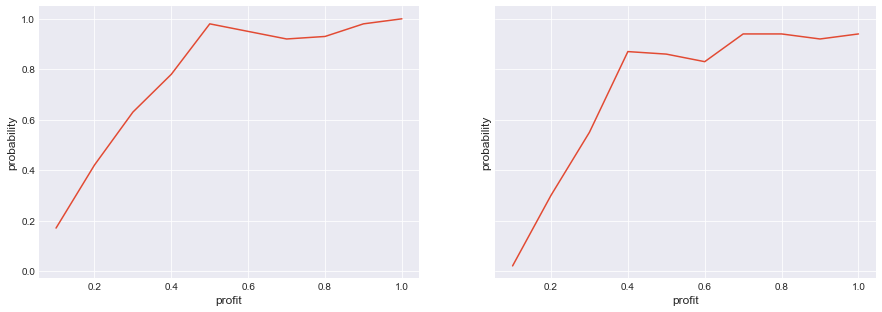

In [33]:
plt.style.use('seaborn-darkgrid')
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True, figsize=(15,5))
x=np.linspace(.1,1,10)
ax1.plot( x, [((additive_array(100, 10, i, -.2)>100).sum())/100 for i in x])
ax1.set_xlabel('profit')
ax1.set_ylabel('probability')
ax2.plot( x, [((multiplicative_array(100, 10, i, -.2)>100).sum())/100 for i in x])
ax2.set_xlabel('profit')
ax2.set_ylabel('probability')